# Figures for article on Urban Heat Wave Climatology


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# file_url = "https://www.dropbox.com/s/rso3fnh7hnwr4ot/All_data.csv?dl=1"  # Note: Need ?dl=1 to make sure this file gets read correctly
# file = 'All_data.csv'
# try:
#     df = pd.read_csv(file_url)
# except:
#     df = pd.read_csv(file)

# df.columns
# df.shape

### 20191114 CPT - I updated the date to use the 20191109 data that fixes the jan/dec overlap
# DropBox

file_url = "https://www.dropbox.com/s/gsirbr783xtrp4f/All_data20191109_final.csv?dl=1"  # Note: Need ?dl=1 to make sure this file gets read correctly
file = 'All_data.csv'
try:
    df = pd.read_csv(file_url)
except:
    df = pd.read_csv(file)

df.columns
df.shape

(883026, 12)

In [3]:
df.head()

,Event_ID,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,events,intensity,tmax,year
0,0,2784,Germany,1,1,44.459750,3.859750,3.859750,['1983.07.27'],[3.85975],[44.45975],1983
1,1,2372,France,1,1,43.331635,2.731635,2.731635,['1983.07.31'],[2.731635],[43.331635],1983
2,2,6156,Kazakhstan,1,1,41.336376,0.736376,0.736376,['1983.07.31'],[0.736376],[41.336376],1983
3,3,2833,Germany,1,1,47.493180,6.893180,6.893180,['1983.07.27'],[6.89318],[47.49318],1983
4,4,2885,Austria,1,1,44.013890,3.413890,3.413890,['1983.07.27'],[3.41389],[44.01389],1983


In [4]:
# Make Severity column

df['severity'] = df['duration'] * df['tot_intensity']

In [5]:
df.head()

,Event_ID,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,events,intensity,tmax,year,severity
0,0,2784,Germany,1,1,44.459750,3.859750,3.859750,['1983.07.27'],[3.85975],[44.45975],1983,3.859750
1,1,2372,France,1,1,43.331635,2.731635,2.731635,['1983.07.31'],[2.731635],[43.331635],1983,2.731635
2,2,6156,Kazakhstan,1,1,41.336376,0.736376,0.736376,['1983.07.31'],[0.736376],[41.336376],1983,0.736376
3,3,2833,Germany,1,1,47.493180,6.893180,6.893180,['1983.07.27'],[6.89318],[47.49318],1983,6.893180
4,4,2885,Austria,1,1,44.013890,3.413890,3.413890,['1983.07.27'],[3.41389],[44.01389],1983,3.413890


## Get some basic stats on our data

In [6]:
# How many cities? 
print("There are {n} cities in our dataset".format(n=df['ID_HDC_G0'].nunique()))
print("There are {n} countries in our dataset".format(n=df['CTR_MN_NM'].nunique()))
print("There are {n} years in our dataset, from {ymin} to {ymax}".format(
    n=df['year'].nunique(),
    ymin=df['year'].min(),
    ymax=df['year'].max()
))

There are 7028 cities in our dataset
There are 124 countries in our dataset
There are 34 years in our dataset, from 1983 to 2016


# How many Heat Wave Events have occurred each year?

Text(0, 0.5, 'Number of Global Events')

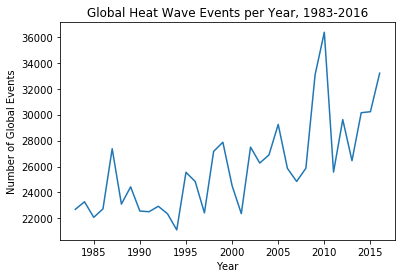

In [7]:
data = df.groupby('year')['ID_HDC_G0'].count()
plt.plot(data)
plt.title('Global Heat Wave Events per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Number of Global Events')

# What has been the average duration and intensity of Heat Waves each Year?

Text(0, 0.5, 'Duration, days')

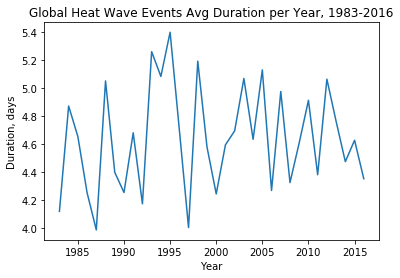

In [8]:
data = df.groupby('year')['duration'].mean()
plt.plot(data)
plt.title('Global Heat Wave Events Avg Duration per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Duration, days')

Text(0, 0.5, 'Avg. Temp C')

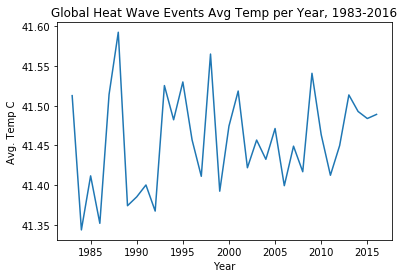

In [9]:
data = df.groupby('year')['avg_temp'].mean() # careful, this is an average of an average
plt.plot(data)
plt.title('Global Heat Wave Events Avg Temp per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Avg. Temp C')

Text(0, 0.5, 'Avg. Total Intensity C')

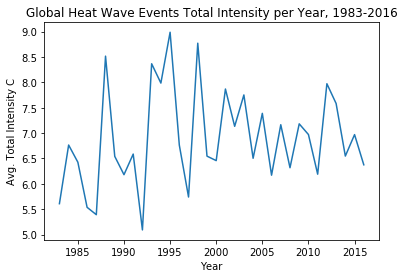

In [10]:
data = df.groupby('year')['tot_intensity'].mean() # careful, this is an average of an average
plt.plot(data)
plt.title('Global Heat Wave Events Total Intensity per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Avg. Total Intensity C')

# How many cities have experienced heat waves?

Note: this isn't all the cities in the entire city database, only cities that have had at least one extreme heat event

In [11]:
city_data = df.groupby(['year'])['ID_HDC_G0'].nunique()

Text(0, 0.5, 'Number of Cities')

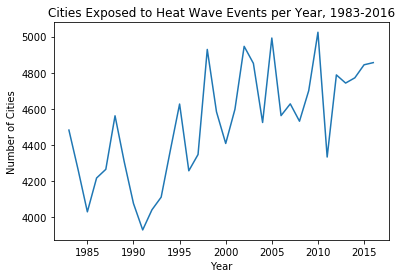

In [12]:
plt.plot(city_data)
plt.title('Cities Exposed to Heat Wave Events per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Number of Cities')

7028


Text(0, 0.5, 'Number of Cities')

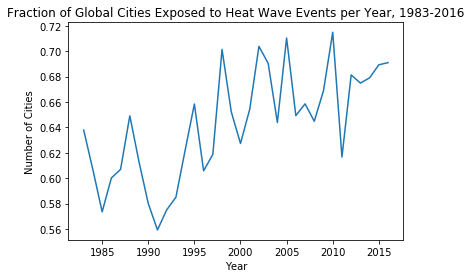

In [13]:
n_cities = df['ID_HDC_G0'].nunique()
print(n_cities)
plt.plot(city_data / n_cities)
plt.title('Fraction of Global Cities Exposed to Heat Wave Events per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Number of Cities')

# How many countries are experiencing heat waves each year?

Text(0, 0.5, 'Number of Countries')

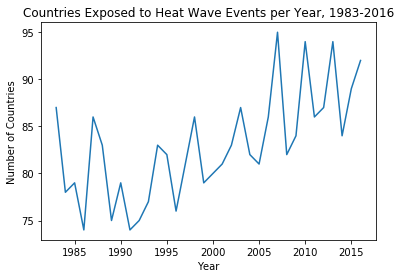

In [14]:
data = df.groupby(['year'])['CTR_MN_NM'].nunique()
plt.plot(data)
plt.title('Countries Exposed to Heat Wave Events per Year, 1983-2016')
plt.xlabel('Year')
plt.ylabel('Number of Countries')

# What is the distribution of the duration of heat waves over the past 30 years?

In [15]:
data = df['duration']

In [16]:
x = np.sort(data)
n = x.size
y = np.arange(1, n + 1) / n

Text(0.5, 1.0, 'Distribution Heat Wave Durations, 1983-2016')

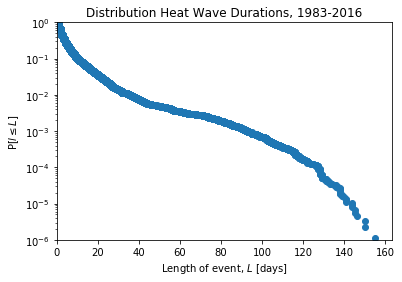

In [17]:
plt.scatter(x=x, y=1-y)
plt.yscale('log')
plt.axis([0, max(x), 0.000001, 1])
plt.xlabel('Length of event, $L$ [days]')
plt.ylabel('P[$l \leq L$]')
plt.title('Distribution Heat Wave Durations, {min_year}-{max_year}'.format(
    min_year=min(df['year']),
    max_year=max(df['year'])
    ))

## What country has the most city-days of heat waves?

In [18]:
city_data = df.groupby(['year','CTR_MN_NM'])['total_days'].sum()


## Top 10 Countries experiencing the largest increases in the number of heat waves.

In [ ]:
# Have to drop duplicates for total days for each city for each year
# this will create the correct results in present form 

def country_over_time(df, country):
    c_data = df[df.CTR_MN_NM == country]
    return c_data.groupby(['year'])['total_days'].sum()


In [ ]:
countries = df['CTR_MN_NM'].unique()

In [ ]:
country_data = df.groupby(['CTR_MN_NM','year'])['total_days'].count()
(country_data.groupby(level='CTR_MN_NM').max() - country_data.groupby(level='CTR_MN_NM').min()).sort_values(ascending=False)[0:10]

# How has extreme heat evens changed by decade & country?

In [19]:
def event_subset(df, country, start, end):
    """ Takes a Tmax data frame, and subsets by country and years"""
    
    # Change data type
    df['year'] = df['year'].astype(str).astype(int)
    
    country_df = df[df['CTR_MN_NM'] == country].copy()
    range_df = country_df[(country_df['year'] >= start) & (country_df['year'] <= end)]
    
    return range_df

In [20]:
# Culm dist ordering
# prob event duration is larger than each duration in rank order 

def p_X_gt_x(df, stat, X=None):
    
    """Makes probabiliy distribution of data, stat is the data we want to sort"""
    
    data = df[stat].sort_values()
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

## Global

In [32]:
# Get Decade subsets for the entire dataset

country = 'Global'
stat86_95  = df[(df['year'] >= 1986) & (df['year'] <= 1995)]
stat96_05  = df[(df['year'] >= 1996) & (df['year'] <= 2005)]
stat06_15  = df[(df['year'] >= 2006) & (df['year'] <= 2015)]

stat = 'duration'
stat86_95 = pd.Series(stat86_95[stat])
stat96_05 = pd.Series(stat96_05[stat])
stat06_15 = pd.Series(stat06_15[stat])


### Percentiles

In [33]:
for q in [50, 90, 95, 99, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat86_95, q)))

50th percentile: 2.0
90th percentile: 11.0
95th percentile: 16.0
99th percentile: 33.0
99.9th percentile: 84.0
100th percentile: 145.0


In [35]:
for q in [50, 90, 95, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat96_05, q)))

50th percentile: 2.0
90th percentile: 11.0
95th percentile: 17.0
99.9th percentile: 95.0
100th percentile: 163.0


In [29]:
for q in [50, 90, 95, 99, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat06_15, q)))

50th percentile: 0.70386175
90th percentile: 1.7537293622000005
95th percentile: 2.1401994767999994
99th percentile: 3.214295065619989
99.9th percentile: 5.162551762254031
100th percentile: 16.031435000000002


### Plot it

In [36]:
# Get data by decade

data = [stat86_95, stat96_05, stat06_15]


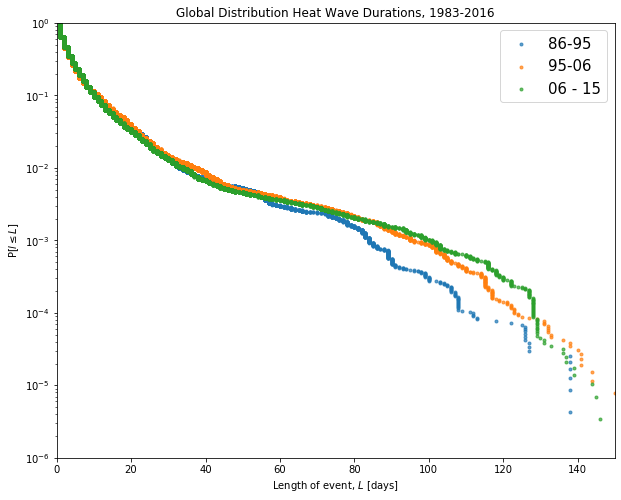

In [37]:
# Size
fig = plt.figure(figsize=[10,8])

for series in data:
    x = np.sort(series)
    n = x.size
    y = np.arange(1, n + 1) / n

    plt.scatter(x=x, y=1-y, alpha = 0.7, marker = '.')
    plt.yscale('log')
    plt.axis([0, max(x), 0.000001, 1])
    plt.xlabel('Length of event, $L$ [days]')
    plt.ylabel('P[$l \leq L$]')
    plt.title(country+' Distribution Heat Wave Durations, {min_year}-{max_year}'.format(
    min_year=min(df['year']),
    max_year=max(df['year'])
    ))
    
# Labels
leg_labels = ['86-95', '95-06', '06 - 15']
plt.legend(leg_labels, fontsize = 15)

## By Country

In [ ]:
# Subset for specific countries

country = 'Nigeria'
stat86_95 = event_subset(df, country, start = 1986, end = 1995)
stat96_05 = event_subset(df, country, start = 1996, end = 2005)
stat06_15 = event_subset(df, country, start = 2006, end = 2015)

stat = 'duration'
stat86_95 = pd.Series(stat86_95[stat])
stat96_05 = pd.Series(stat96_05[stat])
stat06_15 = pd.Series(stat06_15[stat])

### Percentiles

In [ ]:
for q in [50, 90, 95, 99, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat86_95, q)))

In [ ]:
for q in [50, 90, 95, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat96_05, q)))

In [ ]:
for q in [50, 90, 95, 99, 99.9, 100]:
    print("{}th percentile: {}".format (q, np.percentile(stat06_15, q)))

### Plot it

In [ ]:
# Get data by decade

data = [stat86_95, stat96_05, stat06_15]


In [ ]:
# Size
fig = plt.figure(figsize=[10,8])

for series in data:
    x = np.sort(series)
    n = x.size
    y = np.arange(1, n + 1) / n

    plt.scatter(x=x, y=1-y, alpha = 0.7, marker = '.')
    plt.yscale('log')
    plt.axis([0, max(x), 0.000001, 1])
    plt.xlabel('Length of event, $L$ [days]')
    plt.ylabel('P[$l \leq L$]')
    plt.title(country+' Distribution Heat Wave Durations, {min_year}-{max_year}'.format(
    min_year=min(df['year']),
    max_year=max(df['year'])
    ))
    
# Labels
leg_labels = ['86-95', '95-06', '06 - 15']
plt.legend(leg_labels, fontsize = 15)